# Movie Recommendation

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval

### Load Data

In [2]:
credits_df = pd.read_csv('tmdb_5000_credits.csv')
movies_df = pd.read_csv('tmdb_5000_movies.csv')

### Read Data

In [3]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [5]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
movies_df.sort_values('release_date')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4592,385907,"[{""id"": 18, ""name"": ""Drama""}]",NaN,3059,"[{""id"": 279, ""name"": ""usa""}, {""id"": 2487, ""nam...",en,Intolerance,"The story of a poor young woman, separated by ...",3.232447,"[{""name"": ""Triangle Film Corporation"", ""id"": 1...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1916-09-04,8394751,197.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Cruel Hand of Intolerance,Intolerance,7.4,60
4661,245000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,3060,"[{""id"": 2504, ""name"": ""world war i""}, {""id"": 1...",en,The Big Parade,The story of an idle rich boy who joins the US...,0.785744,"[{""name"": ""Metro-Goldwyn-Mayer (MGM)"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1925-11-05,22000000,151.0,[],Released,NaN,The Big Parade,7.0,21
2638,92620000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 878, ""nam...",NaN,19,"[{""id"": 312, ""name"": ""man vs machine""}, {""id"":...",de,Metropolis,In a futuristic city sharply divided between t...,32.351527,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}]",1927-01-10,650422,153.0,"[{""iso_639_1"": ""xx"", ""name"": ""No Language""}]",Released,There can be no understanding between the hand...,Metropolis,8.0,657
4457,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,905,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",de,Die Büchse der Pandora,The rise and inevitable fall of an amoral but ...,1.824184,"[{""name"": ""Nero Films"", ""id"": 4903}]","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}]",1929-01-30,0,109.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}]",Released,NaN,Pandora's Box,7.6,45
4594,379000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",NaN,65203,"[{""id"": 4344, ""name"": ""musical""}, {""id"": 10229...",en,The Broadway Melody,"Harriet and Queenie Mahoney, a vaudeville act,...",0.968865,"[{""name"": ""Metro-Goldwyn-Mayer (MGM)"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1929-02-08,4358000,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The pulsating drama of Broadway's bared heart ...,The Broadway Melody,5.0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,8500000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxsearchlight.com/thebirthofanation/,339408,"[{""id"": 2831, ""name"": ""slavery""}]",en,The Birth of a Nation,"Nat Turner, a former slave in America, leads a...",9.452808,"[{""name"": ""Phantom Four"", ""id"": 423}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-09-09,15861566,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Untold Story of Nat Turner,The Birth of a Nation,6.5,178
3302,8000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,374461,"[{""id"": 1650, ""name"": ""cook""}, {""id"": 6054, ""n...",en,Mr. Church,A unique friendship develops when a little gir...,7.828459,"[{""name"": ""Envision Media Arts"", ""id"": 19456},...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-09-16,0,104.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He was the one person she could always count on.,Mr. Church,7.0,129
3408,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,325373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 46...",en,Two Lovers and a Bear,Set in a small town near the North Pole where ...,3.139294,[],[],2016-10-02,0,96.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Two Lovers and a Bear,6.8,27
4255,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",http://www.growingupsmithmovie.com,426469,[],en,Growing Up Smith,"

### Feature Engineering

#### Columns Selection

In [8]:
# Merge Data on 'id'
credits_df.rename(columns={'movie_id': 'id'}, inplace=True) # Rename credits_df 'movie_id' to 'id'
df = pd.merge(credits_df,movies_df[['id','genres','keywords']],on='id', how='left') # Merge 'genres' and 'keywords' from movies_df to credits_df

#df = movies_df.merge(credits_df, on='id', how='left')
#df = movies_df[['id', 'title', 'genres', 'cast', 'crew', 'keywords']]

In [9]:
df.head()

,id,title,cast,crew,genres,keywords
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."


#### Extract Required Data

The movie data is present in the form of lists containing strings, we need to convert the data into a safe and usable structure.

AST literal_eval: Safely evaluate an expression node or a string containing a Python literal or container display. The string or node provided may only consist of the following Python literal structures: strings, bytes, numbers, tuples, lists, dicts, sets, booleans, None, bytes and sets.

In [10]:
# Convert string data into safe and usable structure
from ast import literal_eval
features = ['cast', 'crew', 'genres', 'keywords']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)
df[features].head()

,cast,crew,genres,keywords
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 1463, 'name': 'culture clash'}, {'id':..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 818, 'name': 'based on novel'}, {'id':..."


In [11]:
# Taking a look in the crew column
df.iloc[0]['crew']

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [12]:
# Extract Director name from crew column
def get_director(x):
    for i in x:
        if i['job'] == 'Director':   
            return i['name']
    return np.nan # return NaN if director is not listed

# Create new column director with the director's name
df['director'] = df['crew'].apply(get_director) # get director from 'crew' column
df.head()

,id,title,cast,crew,genres,keywords,director
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",Gore Verbinski
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",Sam Mendes
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",Christopher Nolan
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 818, 'name': 'based on novel'}, {'id':...",Andrew Stanton


In [13]:
# Taking a look in the cast column
df.iloc[0]['cast']

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [14]:
# Extract top 5 cast from casts column

# get_topfive() returns the top 5 elements or the entire list
def get_topfive(x):
    if isinstance(x, list):   # checks if x is an instance or subclass of list 
        names = [i['name'] for i in x]
        # Check if more than 5 elements exist. If yes, return only first 5. If no, return entire list.
        if len(names) > 5: 
            names = names[:5] # get top 5 names
        return names
    # Return empty list in case of missing/malformed data
    return []

# Apply fx to cast column
features = ["cast"]
for feature in features:
    df[feature] = df[feature].apply(get_topfive) # get top 5 elements 

df.head()

,id,title,cast,crew,genres,keywords,director
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",Gore Verbinski
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",Sam Mendes
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",Christopher Nolan
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 818, 'name': 'based on novel'}, {'id':...",Andrew Stanton


In [15]:
# get_topthree() returns the top 3 elements or the entire list
def get_topthree(x):
    if isinstance(x, list):   # checks if x is an instance or subclass of list 
        names = [i['name'] for i in x]
        # Check if more than 5 elements exist. If yes, return only first 5. If no, return entire list.
        if len(names) > 3: 
            names = names[:3] # get top 3 elements
        return names
    # Return empty list in case of missing/malformed data
    return []

# Apply fx to columns
features = ["keywords", "genres"]
for feature in features:
    df[feature] = df[feature].apply(get_topthree) # get top 3 elements 

df.head()

,id,title,cast,crew,genres,keywords,director
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[Action, Adventure, Fantasy]","[culture clash, future, space war]",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]",Gore Verbinski
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[Action, Adventure, Crime]","[spy, based on novel, secret agent]",Sam Mendes
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]",Christopher Nolan
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]",Andrew Stanton


### Clean Data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
 4   genres    4803 non-null   object
 5   keywords  4803 non-null   object
 6   director  4773 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.2+ KB


In [17]:
# Check for null values 
df.isna().sum()

id           0
title        0
cast         0
crew         0
genres       0
keywords     0
director    30
dtype: int64

We don't drop null since we are doing movie recommendation by metadata, missing director names does not really affect the quality of the recommendations as there are other features/keywords available, so we kept the rows with null.

In [18]:
df

,id,title,cast,crew,genres,keywords,director
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[Action, Adventure, Fantasy]","[culture clash, future, space war]",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]",Gore Verbinski
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[Action, Adventure, Crime]","[spy, based on novel, secret agent]",Sam Mendes
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]",Christopher Nolan
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]",Andrew Stanton
...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...","[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms]",Robert Rodriguez
4799,72766,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...","[Comedy, Romance]",[],Edward Burns
4800,231617,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...","[Comedy, Drama, Romance]","[date, love at first sight, narration]",Scott Smith
4801,126186,Shanghai Calling,"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...","[{'credit_id': '52fe4ad9c3a368484e16a36b', 'de...",[],[],Daniel Hsia


In [19]:
# Check for duplicate titles
df['duplicated_title'] = df.duplicated(subset=['title'])
is_true = df['duplicated_title'] == True
duplicated_title_true = df[is_true]
duplicated_title_true

,id,title,cast,crew,genres,keywords,director,duplicated_title
2877,1255,The Host,"[Song Kang-ho, Park Hae-il, Bae Doona, Ko Ah-s...","[{'credit_id': '52fe42eac3a36847f802ca6b', 'de...","[Horror, Drama, Science Fiction]","[river, mobile phone, bravery]",Bong Joon-ho,True
3693,10844,Out of the Blue,"[Karl Urban, Tandi Wright, Simon Ferry, Matthe...","[{'credit_id': '52fe43c19251416c7501cceb', 'de...",[Drama],"[new zealand, gun rampage, police]",Robert Sarkies,True
4267,2661,Batman,"[Adam West, Burt Ward, Lee Meriwether, Cesar R...","[{'credit_id': '52fe4363c3a36847f80509a7', 'de...","[Family, Adventure, Comedy]","[submarine, dc comics, missile]",Leslie H. Martinson,True


We check to see if the 3 duplicated titles are indeed duplicated by looking at information like release date, director, production information (companies, countries etc). 

In [20]:
# Check on the duplicates
the_host = movies_df['title'] == 'The Host'
movies_df[the_host]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
972,44000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,72710,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,The Host,A parasitic alien soul is injected into the bo...,42.933027,"[{""name"": ""Nick Wechsler Productions"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-03-22,63327201,125.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You will be one of us,The Host,6.0,1817
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",http://www.hostmovie.com/,1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,Monsters are real.,The Host,6.7,537


In [21]:
ootb = movies_df['title'] == 'Out of the Blue'
movies_df[ootb]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
3647,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,39269,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",en,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,0.679351,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",1980-05-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A harrowing drama from the director of Easy Rider,Out of the Blue,6.5,17
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18


In [22]:
batman = movies_df['title'] == 'Batman'
movies_df[batman]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1359,35000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",NaN,268,"[{""id"": 848, ""name"": ""double life""}, {""id"": 84...",en,Batman,The Dark Knight of Gotham City begins his war ...,44.104469,"[{""name"": ""PolyGram Filmed Entertainment"", ""id...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",1989-06-23,411348924,126.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Have you ever danced with the devil in the pal...,Batman,7.0,2096
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


In [23]:
# Convert to lowercase and remove spaces
def clean_data(row):
    if isinstance(row, list):
        return [str.lower(i.replace(" ", "")) for i in row]
    else:
        if isinstance(row, str):
            return str.lower(row.replace(" ", ""))
        else:
            return ""

features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    df[feature] = df[feature].apply(clean_data)
    
df.head()

,id,title,cast,crew,genres,keywords,director,duplicated_title
0,19995,Avatar,"[samworthington, zoesaldana, sigourneyweaver, ...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[action, adventure, fantasy]","[cultureclash, future, spacewar]",jamescameron,False
1,285,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley, ste...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[adventure, fantasy, action]","[ocean, drugabuse, exoticisland]",goreverbinski,False
2,206647,Spectre,"[danielcraig, christophwaltz, léaseydoux, ralp...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[action, adventure, crime]","[spy, basedonnovel, secretagent]",sammendes,False
3,49026,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman, anne...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[action, crime, drama]","[dccomics, crimefighter, terrorist]",christophernolan,False
4,49529,John Carter,"[taylorkitsch, lynncollins, samanthamorton, wi...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[action, adventure, sciencefiction]","[basedonnovel, mars, medallion]",andrewstanton,False


In [24]:
# Drop columns crew and duplicated_title
df = df.drop(['crew', 'duplicated_title'], axis=1)
df.head()

,id,title,cast,genres,keywords,director
0,19995,Avatar,"[samworthington, zoesaldana, sigourneyweaver, ...","[action, adventure, fantasy]","[cultureclash, future, spacewar]",jamescameron
1,285,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley, ste...","[adventure, fantasy, action]","[ocean, drugabuse, exoticisland]",goreverbinski
2,206647,Spectre,"[danielcraig, christophwaltz, léaseydoux, ralp...","[action, adventure, crime]","[spy, basedonnovel, secretagent]",sammendes
3,49026,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman, anne...","[action, crime, drama]","[dccomics, crimefighter, terrorist]",christophernolan
4,49529,John Carter,"[taylorkitsch, lynncollins, samanthamorton, wi...","[action, adventure, sciencefiction]","[basedonnovel, mars, medallion]",andrewstanton


In [25]:
df.shape

(4803, 6)

In [26]:
# Create soup so recommendation system can calculate similarity between movies
def create_soup(features):
    return ' '.join(features['genres']) + ' ' + ' '.join(features['keywords']) + ' ' + ' '.join(features['cast']) + ' ' + features['director']

df['soup'] = df.apply(create_soup, axis=1)
df.iloc[0]['soup']

'action adventure fantasy cultureclash future spacewar samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez jamescameron'

In [27]:
df.head()

,id,title,cast,genres,keywords,director,soup
0,19995,Avatar,"[samworthington, zoesaldana, sigourneyweaver, ...","[action, adventure, fantasy]","[cultureclash, future, spacewar]",jamescameron,action adventure fantasy cultureclash future s...
1,285,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley, ste...","[adventure, fantasy, action]","[ocean, drugabuse, exoticisland]",goreverbinski,adventure fantasy action ocean drugabuse exoti...
2,206647,Spectre,"[danielcraig, christophwaltz, léaseydoux, ralp...","[action, adventure, crime]","[spy, basedonnovel, secretagent]",sammendes,action adventure crime spy basedonnovel secret...
3,49026,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman, anne...","[action, crime, drama]","[dccomics, crimefighter, terrorist]",christophernolan,action crime drama dccomics crimefighter terro...
4,49529,John Carter,"[taylorkitsch, lynncollins, samanthamorton, wi...","[action, adventure, sciencefiction]","[basedonnovel, mars, medallion]",andrewstanton,action adventure sciencefiction basedonnovel m...


In [28]:
df['soup'].head()

0    action adventure fantasy cultureclash future s...
1    adventure fantasy action ocean drugabuse exoti...
2    action adventure crime spy basedonnovel secret...
3    action crime drama dccomics crimefighter terro...
4    action adventure sciencefiction basedonnovel m...
Name: soup, dtype: object

In [29]:
df.iloc[0]['soup']

'action adventure fantasy cultureclash future spacewar samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez jamescameron'

### Exploratory Data Analysis

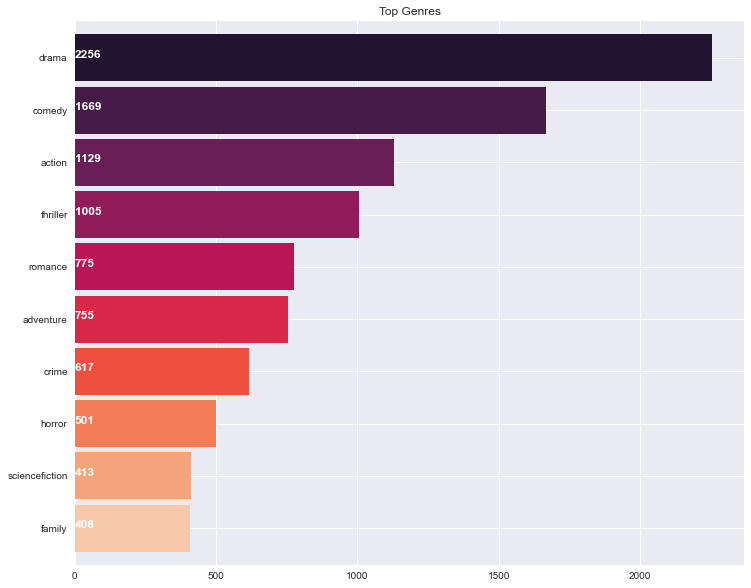

In [30]:
# Movie counts by genres
plt.subplots(figsize=(12,10))

# Extract values from genres column and append to genres_list
genres_list = []
for i in df['genres']:
    genres_list.extend(i)

# Plot bar graph
ax = pd.Series(genres_list).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('rocket_r',10))

# Show counts in each bar
for i, v in enumerate(pd.Series(genres_list).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')

plt.title('Top Genres')
plt.show()

In [31]:
genres_list

['action',
 'adventure',
 'fantasy',
 'adventure',
 'fantasy',
 'action',
 'action',
 'adventure',
 'crime',
 'action',
 'crime',
 'drama',
 'action',
 'adventure',
 'sciencefiction',
 'fantasy',
 'action',
 'adventure',
 'animation',
 'family',
 'action',
 'adventure',
 'sciencefiction',
 'adventure',
 'fantasy',
 'family',
 'action',
 'adventure',
 'fantasy',
 'adventure',
 'fantasy',
 'action',
 'adventure',
 'action',
 'thriller',
 'adventure',
 'fantasy',
 'action',
 'action',
 'adventure',
 'western',
 'action',
 'adventure',
 'fantasy',
 'adventure',
 'family',
 'fantasy',
 'sciencefiction',
 'action',
 'adventure',
 'adventure',
 'action',
 'fantasy',
 'action',
 'comedy',
 'sciencefiction',
 'action',
 'adventure',
 'fantasy',
 'action',
 'adventure',
 'fantasy',
 'action',
 'adventure',
 'adventure',
 'fantasy',
 'adventure',
 'fantasy',
 'adventure',
 'drama',
 'action',
 'drama',
 'romance',
 'thriller',
 'adventure',
 'action',
 'sciencefiction',
 'thriller',
 'action',
 '

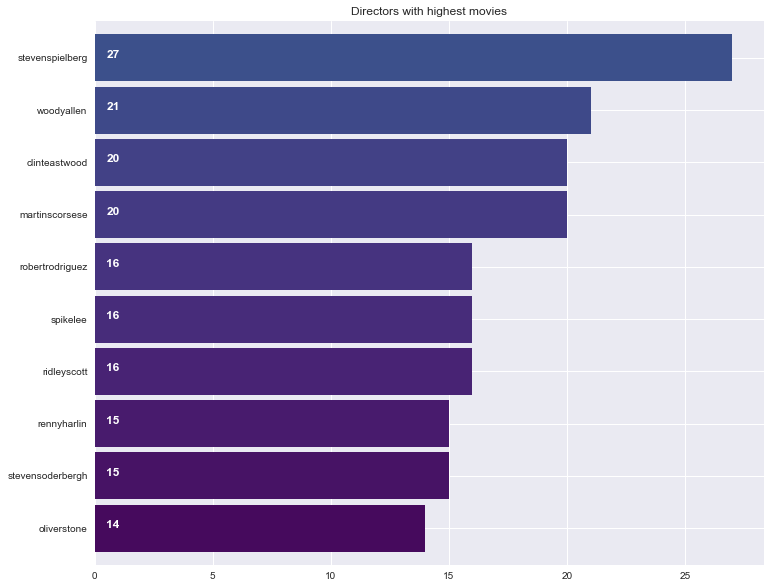

In [32]:
# Directors with highest movies
plt.subplots(figsize=(12,10))

# Plot bar graph
ax = df[df['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('viridis', 40))

# Show counts in each bar
for i, v in enumerate(df[df['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')

    plt.title('Directors with highest movies')
plt.show()

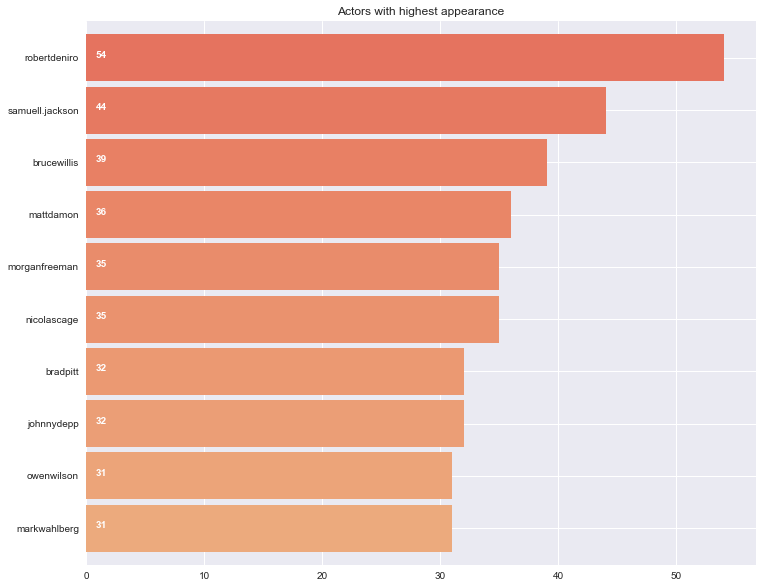

In [33]:
# Actors with Highest Appearances
plt.subplots(figsize=(12,10))

# Extract values from cast column and append to actors_list
actors_list=[]
for i in df['cast']:
    actors_list.extend(i)
    
# Plot bar graph
ax=pd.Series(actors_list).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('flare',40))

# Show counts in each bar
for i, v in enumerate(pd.Series(actors_list).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')

plt.title('Actors with highest appearance')
plt.show()

### Recommendation Function

#### Count Vectorizer

In [34]:
# Create matrix
cv = CountVectorizer() 
count_matrix = cv.fit_transform(df['soup']) # returns a matrix of the number count of each word

In [35]:
# Cosine Similarity of Count Vectorizer
# Use cosine_similarity to find the similarity score
cv_cosim = cosine_similarity(count_matrix, count_matrix) 

In [36]:
# Reset index of df and construct reverse mapping again
indices = pd.Series(df.index, index=df['title'])   
print(indices.head())

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64


In [37]:
# Count Vectorizer Recommendation
def cv_recommendations(title, cv_cosim=cv_cosim):
    
    # Find index of the movie that matches the title
    idx = indices[title]   # idx = index of movie
    
    # Get the pairwsie similarity scores of all movies with that movie
    # And convert it into a list of tuples 
    sim_scores = list(enumerate(cv_cosim[idx])) # similarity score of each movie
    
    # Sort the movies based on similarity scores from highest to lowest
    sim_scores= sorted(sim_scores, key=lambda x: x[1], reverse=True) 

    # Top 10 similarity scores (ignore first movie as it's itself)
    sim_scores= sim_scores[1:11] 
    
    # Get the movie index
    movies_indices = [ind[0] for ind in sim_scores] 
    
    # Return the top 10 most similar movies
    movies = df["title"].iloc[movies_indices] 
    
    return movies

#### Trials

In [38]:
print("Count Vectorizer - The Hunger Games:")
print(cv_recommendations("The Hunger Games", cv_cosim))

Count Vectorizer - The Hunger Games:
102     The Hunger Games: Mockingjay - Part 2
183           The Hunger Games: Catching Fire
200     The Hunger Games: Mockingjay - Part 1
661                Zathura: A Space Adventure
193                               After Earth
91               Independence Day: Resurgence
256                                 Allegiant
294                                      Epic
1326                             The 5th Wave
46                 X-Men: Days of Future Past
Name: title, dtype: object


In [39]:
print("Count Vectorizer - The Avengers:")
print(cv_recommendations("The Avengers", cv_cosim))

Count Vectorizer - The Avengers:
7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
85     Captain America: The Winter Soldier
169     Captain America: The First Avenger
174                    The Incredible Hulk
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object


In [40]:
print("Count Vectorizer - Toy Story:")
print(cv_recommendations("Toy Story", cv_cosim))

Count Vectorizer - Toy Story:
343                                           Toy Story 2
42                                            Toy Story 3
40                                                 Cars 2
533                                         Monster House
3670                                      Running Forever
1983                                     Meet the Deedles
3403    Alpha and Omega: The Legend of the Saw Tooth Cave
927                             Christmas with the Kranks
120                           Madagascar: Escape 2 Africa
725                                        The Shaggy Dog
Name: title, dtype: object


#### TF-IDF (Term Frequency - Inverse Document Frequency)

In [41]:
tfidf = TfidfVectorizer() 
tfidf_matrix = tfidf.fit_transform(df['soup']) 
print(tfidf_matrix.shape)

(4803, 15274)


In [42]:
# Cosine Similarity of TF-IDF
# Cosine similarity determine how similar the documents are irrespective of their size
tfidf_cosim = cosine_similarity(tfidf_matrix, tfidf_matrix) 
print(tfidf_cosim.shape)

(4803, 4803)


In [43]:
print(tfidf_cosim)

[[1.         0.05404102 0.02970711 ... 0.         0.         0.        ]
 [0.05404102 1.         0.02950901 ... 0.         0.         0.        ]
 [0.02970711 0.02950901 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [44]:
# Reset index of df and construct reverse mapping again
indices = pd.Series(df.index, index=df['title'])   ###.drop_duplicates() # Use title to find index
print(indices.head())

title
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64


In [45]:
# TF-IDF Recommendation
def tfidf_recommendations(title, tfidf_cosim=tfidf_cosim):
    
    # Find index of the movie that matches the title
    idx = indices[title]   # idx = index of movie
    
    # Get the pairwsie similarity scores of all movies with that movie
    # And convert it into a list of tuples 
    similarity_scores = list(enumerate(tfidf_cosim[idx])) # similarity score of each movie
    
    # Sort the movies based on similarity scores from highest to lowest
    similarity_scores= sorted(similarity_scores, key=lambda x: x[1], reverse=True) 

    # Top 10 similarity scores (ignore first movie as it's itself)
    similarity_scores= similarity_scores[1:11] 
    
    # Get the movie index
    movies_indices = [ind[0] for ind in similarity_scores] 
    
    # Return the top 10 most similar movies
    movies = df["title"].iloc[movies_indices] 
    
    return movies

#### Trials

In [46]:
print("TF-IDF - The Hunger Games:")
print(tfidf_recommendations("The Hunger Games", tfidf_cosim))

TF-IDF - The Hunger Games:
102     The Hunger Games: Mockingjay - Part 2
183           The Hunger Games: Catching Fire
200     The Hunger Games: Mockingjay - Part 1
382                                Seabiscuit
661                Zathura: A Space Adventure
4399                                  Special
91               Independence Day: Resurgence
46                 X-Men: Days of Future Past
294                                      Epic
101                        X-Men: First Class
Name: title, dtype: object


In [47]:
print("TF-IDF - The Avengers:")
print(tfidf_recommendations("The Avengers", tfidf_cosim))

TF-IDF - The Avengers:
7                   Avengers: Age of Ultron
26               Captain America: Civil War
85      Captain America: The Winter Soldier
79                               Iron Man 2
129                                    Thor
126                    Thor: The Dark World
169      Captain America: The First Avenger
174                     The Incredible Hulk
1294                               Serenity
421                                  Zodiac
Name: title, dtype: object
